In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Assessment_Dataset.csv')

df.head()

,TransactionID,CustomerID,TransactionDate,TransactionAmount,PaymentMethod,Quantity,DiscountPercent,City,StoreType,CustomerAge,CustomerGender,LoyaltyPoints,ProductName,Region,Returned,FeedbackScore,ShippingCost,DeliveryTimeDays,IsPromotional
0,1,16795.0,1/1/2022 0:00,1910.91,Cash,1,35.00,Kolkata,In-Store,32.0,Male,2043,T-Shirt,North,No,4,24.31,5,No
1,2,1860.0,1/1/2022 0:01,58590.27,Cash,1,9.51,Lucknow,Online,40.0,Other,8490,Sofa,West,No,2,1502.96,7,Yes
2,3,39158.0,1/1/2022 0:02,280.21,Debit Card,1,16.55,Lucknow,Online,52.0,Other,6328,Notebook,North,Yes,2,22.30,2,Yes
3,4,NaN,NaN,86485.63,UPI,1,9.53,Jaipur,In-Store,62.0,Other,1139,Laptop,North,No,4,461.38,7,No
4,5,12284.0,1/1/2022 0:04,385.89,Debit Card,22,0.98,Kolkata,Online,31.0,Female,66,Apple,North,No,1,14.44,1,Yes


In [2]:
df.shape

(500000, 19)

In [3]:
df.describe()

,TransactionID,CustomerID,TransactionAmount,Quantity,DiscountPercent,CustomerAge,LoyaltyPoints,FeedbackScore,ShippingCost,DeliveryTimeDays
count,500000.000000,450000.000000,500000.000000,500000.000000,500000.000000,450000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,250000.500000,25497.193667,20405.325920,7.495510,24.999300,45.995611,4999.839514,3.000750,397.300322,5.239588
std,144337.711634,14139.285267,29618.374948,11.003021,14.428633,16.427616,2882.429452,1.414156,672.473414,3.631072
min,1.000000,1000.000000,-999.990000,1.000000,0.000000,18.000000,0.000000,1.000000,0.000000,1.000000
25%,125000.750000,13252.000000,317.990000,1.000000,12.527500,32.000000,2508.750000,2.000000,18.880000,3.000000
50%,250000.500000,25470.000000,1051.140000,3.000000,24.990000,46.000000,5001.000000,3.000000,48.040000,4.000000
75%,375000.250000,37760.000000,44071.807500,8.000000,37.500000,60.000000,7489.000000,4.000000,402.950000,7.000000
max,500000.000000,49999.000000,99996.890000,50.000000,50.000000,74.000000,9999.000000,5.000000,2500.000000,15.000000


In [4]:
# Finding the number of empty rows in a column
empty_cells_count = df.isnull().sum()
print(f"Number of empty cells: {empty_cells_count}")

Number of empty cells: TransactionID            0
CustomerID           50000
TransactionDate      50000
TransactionAmount        0
PaymentMethod        50000
Quantity                 0
DiscountPercent          0
City                     0
StoreType            50000
CustomerAge          50000
CustomerGender       50000
LoyaltyPoints            0
ProductName          50000
Region               42633
Returned                 0
FeedbackScore            0
ShippingCost             0
DeliveryTimeDays         0
IsPromotional            0
dtype: int64


In [5]:
# Sum of all numeric columns
df_sum = df.sum(numeric_only = True)
df_sum

TransactionID        1.250002e+11
CustomerID           1.147374e+10
TransactionAmount    1.020266e+10
Quantity             3.747755e+06
DiscountPercent      1.249965e+07
CustomerAge          2.069802e+07
LoyaltyPoints        2.499920e+09
FeedbackScore        1.500375e+06
ShippingCost         1.986502e+08
DeliveryTimeDays     2.619794e+06
dtype: float64

In [6]:
# Cleaning the data
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerAge'] = df['CustomerAge'].replace('', np.nan).astype(float)
df['DiscountPercent'] = pd.to_numeric(df['DiscountPercent'], errors='coerce')
df.head()

,TransactionID,CustomerID,TransactionDate,TransactionAmount,PaymentMethod,Quantity,DiscountPercent,City,StoreType,CustomerAge,CustomerGender,LoyaltyPoints,ProductName,Region,Returned,FeedbackScore,ShippingCost,DeliveryTimeDays,IsPromotional
0,1,16795.0,2022-01-01 00:00:00,1910.91,Cash,1,35.00,Kolkata,In-Store,32.0,Male,2043,T-Shirt,North,No,4,24.31,5,No
1,2,1860.0,2022-01-01 00:01:00,58590.27,Cash,1,9.51,Lucknow,Online,40.0,Other,8490,Sofa,West,No,2,1502.96,7,Yes
2,3,39158.0,2022-01-01 00:02:00,280.21,Debit Card,1,16.55,Lucknow,Online,52.0,Other,6328,Notebook,North,Yes,2,22.30,2,Yes
3,4,NaN,NaT,86485.63,UPI,1,9.53,Jaipur,In-Store,62.0,Other,1139,Laptop,North,No,4,461.38,7,No
4,5,12284.0,2022-01-01 00:04:00,385.89,Debit Card,22,0.98,Kolkata,Online,31.0,Female,66,Apple,North,No,1,14.44,1,Yes


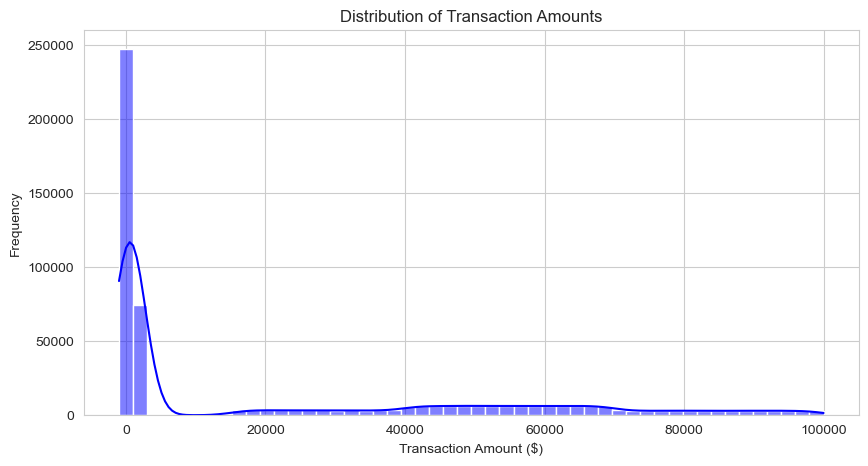

In [7]:
# Set seaborn style
sns.set_style("whitegrid")

# Histogram of Transaction Amounts
plt.figure(figsize=(10,5))
sns.histplot(df["TransactionAmount"], bins=50, kde=True, color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()

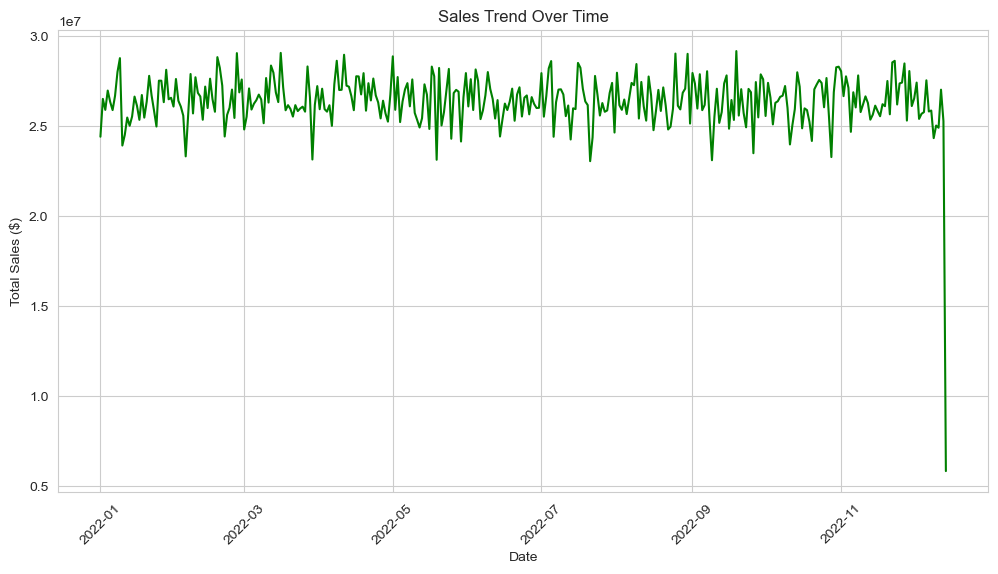

In [8]:
# Sales Trend Over Time
df_time_series = df.groupby(df["TransactionDate"].dt.date)["TransactionAmount"].sum()
plt.figure(figsize=(12, 6))
df_time_series.plot(color="green")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

/var/folders/50/1mr2xd356xggjlrdnm9rnb080000gn/T/ipykernel_30730/2895982462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette="viridis")


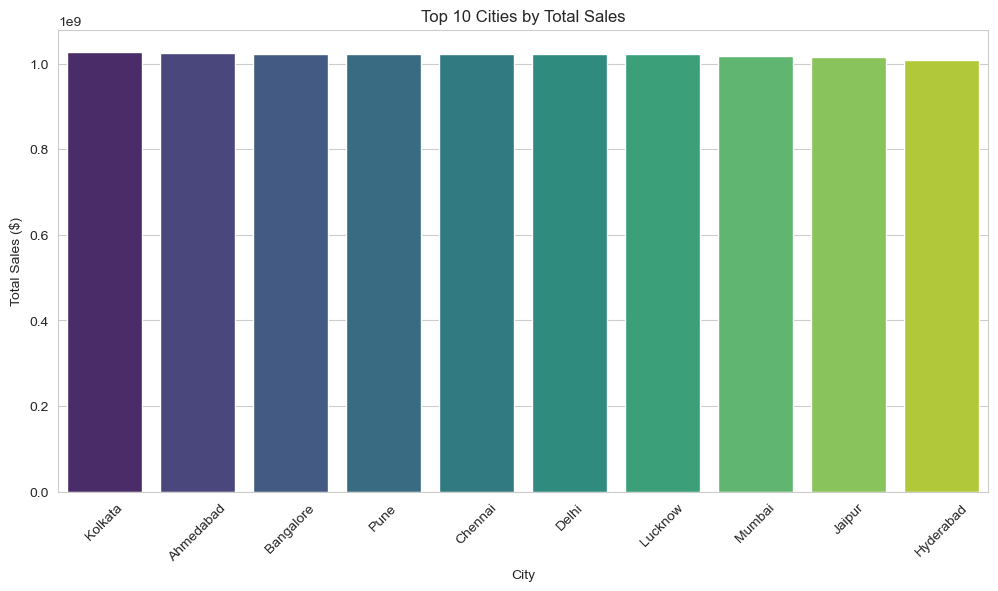

In [9]:
# Top 10 Cities by Sales (Bar Chart)
sales_by_city = df.groupby("City")["TransactionAmount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette="viridis")
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("City")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

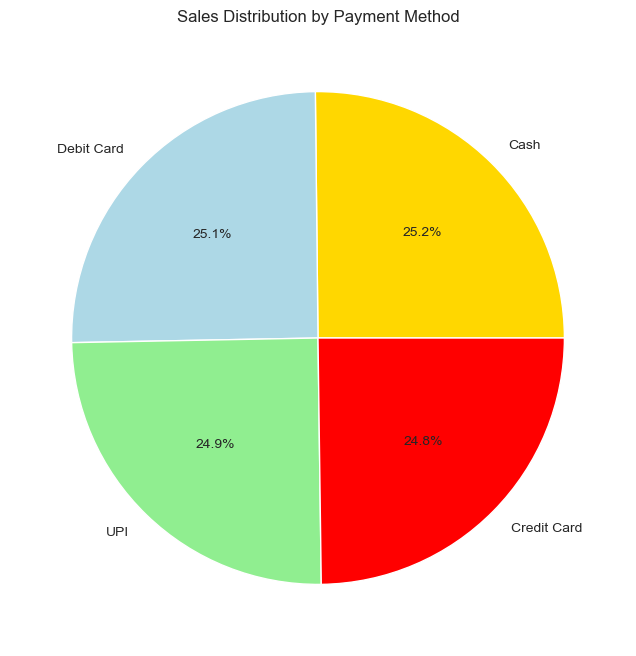

In [10]:
# Payment Method Distribution (Pie Chart)
sales_by_payment = df.groupby("PaymentMethod")["TransactionAmount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
plt.pie(sales_by_payment.values, labels=sales_by_payment.index, autopct="%1.1f%%", colors=["gold", "lightblue", "lightgreen", "red"])
plt.title("Sales Distribution by Payment Method")
plt.show()

/var/folders/50/1mr2xd356xggjlrdnm9rnb080000gn/T/ipykernel_30730/3475464620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=returns_count.index, y=returns_count.values, palette=["red", "blue"])


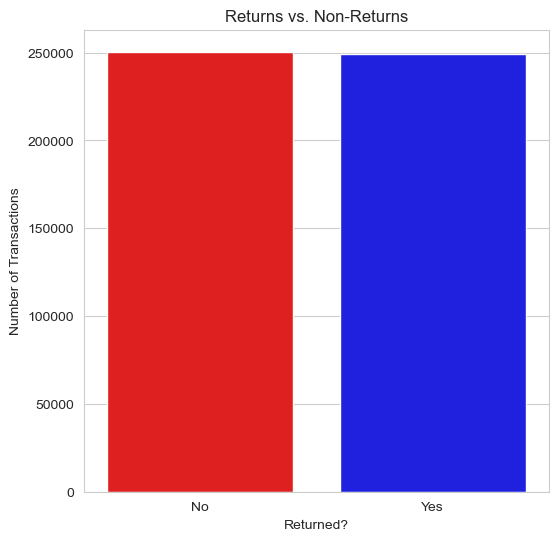

In [11]:
# Returns vs. Non-Returns (Bar Chart)
returns_count = df["Returned"].value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x=returns_count.index, y=returns_count.values, palette=["red", "blue"])
plt.title("Returns vs. Non-Returns")
plt.xlabel("Returned?")
plt.ylabel("Number of Transactions")
plt.show()

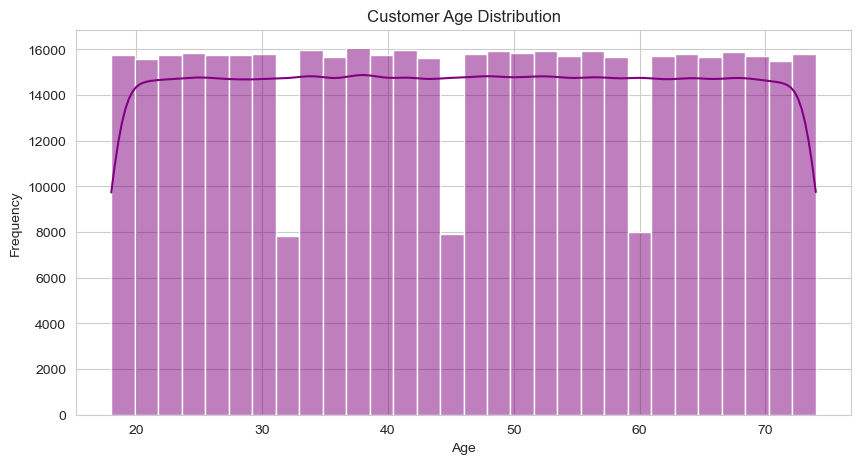

In [12]:
# Customer Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df["CustomerAge"].dropna(), bins=30, kde=True, color="purple")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/var/folders/50/1mr2xd356xggjlrdnm9rnb080000gn/T/ipykernel_30730/1123855306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")


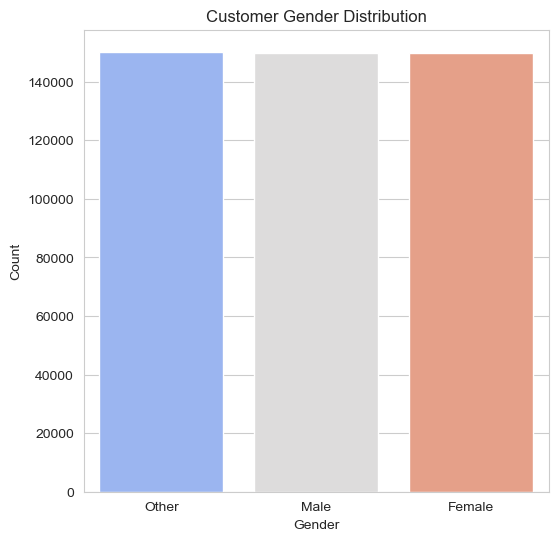

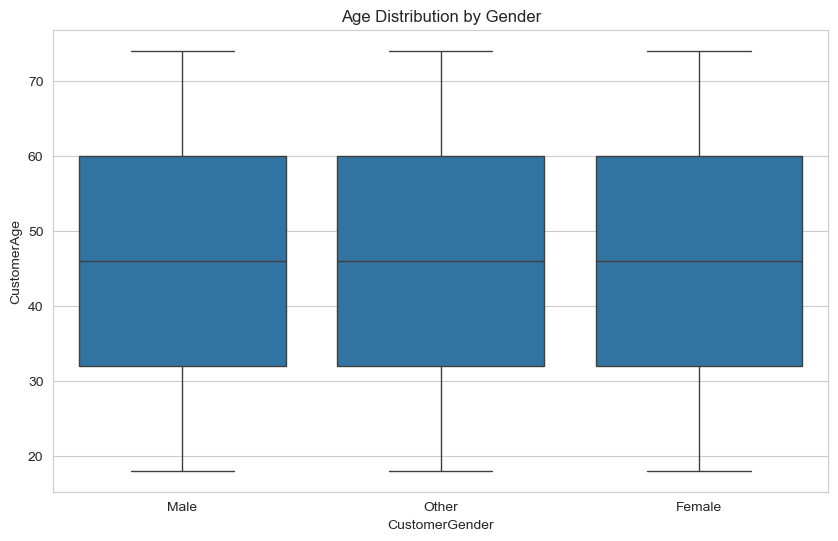

In [13]:
# Customer Gender Distribution
plt.figure(figsize=(6,6))
gender_counts = df["CustomerGender"].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Customer Demographics
plt.figure(figsize=(10,6))
sns.boxplot(x='CustomerGender', y='CustomerAge', data=df)
plt.title('Age Distribution by Gender')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


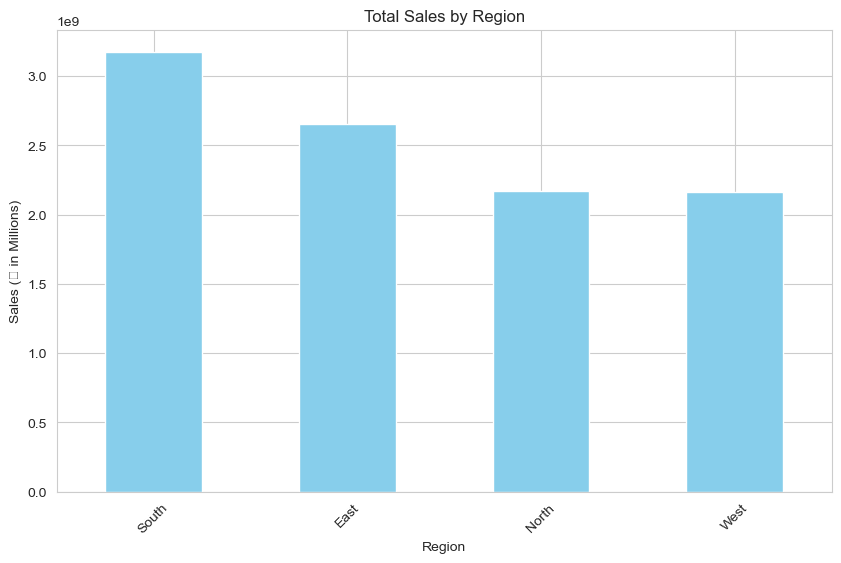

In [14]:
# Regional Performance
regional_sales = df.groupby('Region')['TransactionAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
regional_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.ylabel('Sales (₹ in Millions)')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


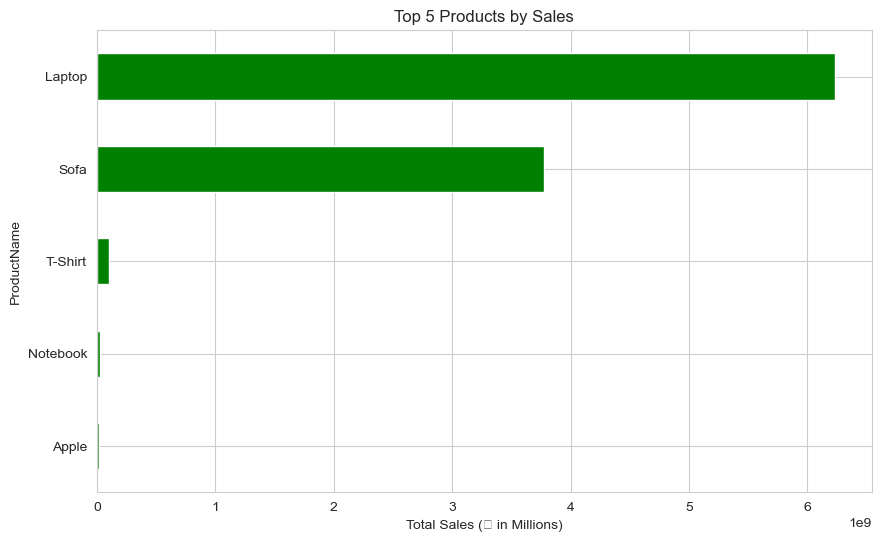

In [15]:
# Product Performance
top_products = df.groupby('ProductName')['TransactionAmount'].sum().nlargest(5)
plt.figure(figsize=(10,6))
top_products.sort_values().plot(kind='barh', color='green')
plt.title('Top 5 Products by Sales')
plt.xlabel('Total Sales (₹ in Millions)')
plt.show()

/var/folders/50/1mr2xd356xggjlrdnm9rnb080000gn/T/ipykernel_30730/2274989483.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = df.groupby(pd.cut(df['DiscountPercent'], bins=[0,10,20,30,40,50]))['TransactionAmount'].mean()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


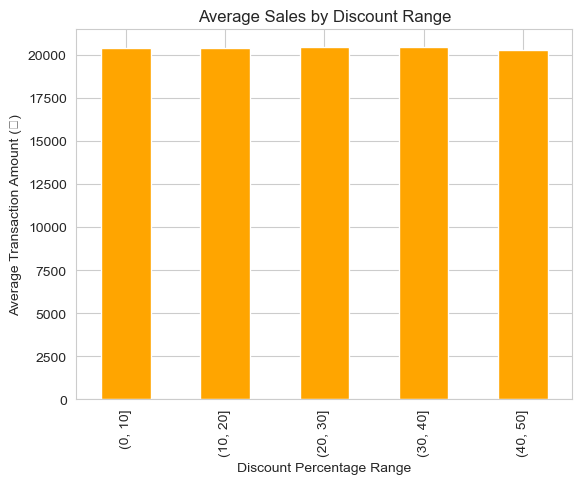

In [16]:
# Discount Impact Analysis
discount_impact = df.groupby(pd.cut(df['DiscountPercent'], bins=[0,10,20,30,40,50]))['TransactionAmount'].mean()
discount_impact.plot(kind='bar', color='orange')
plt.title('Average Sales by Discount Range')
plt.xlabel('Discount Percentage Range')
plt.ylabel('Average Transaction Amount (₹)')
plt.show()

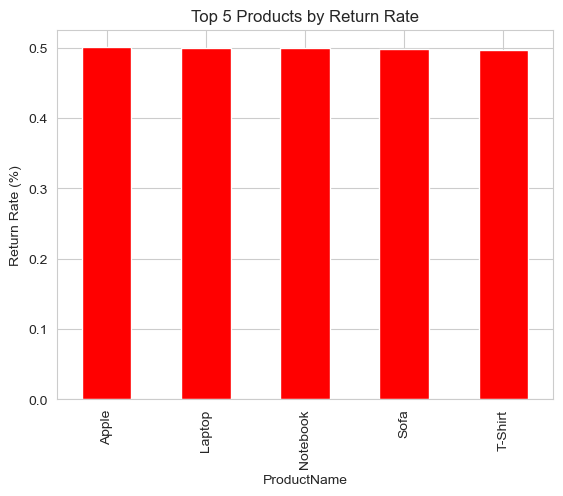

In [17]:
# Returns Analysis
return_rates = df.groupby('ProductName')['Returned'].value_counts(normalize=True).unstack().fillna(0)
return_rates['Yes'].sort_values(ascending=False).head(5).plot(kind='bar', color='red')
plt.title('Top 5 Products by Return Rate')
plt.ylabel('Return Rate (%)')
plt.show()